In [59]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [60]:
# Load the dataset
df = pd.read_csv(r"C:\\Users\\UNKNOWN_CODER\\DSDBA\\Assign4\\BostonHousing.csv")

In [61]:
# Load the dataset
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.shape

(506, 14)

In [7]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [63]:
# Display basic information about the dataset
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [65]:
# Check for missing values
print("\nMissing Values in Dataset:")
print(df.isna().sum())


Missing Values in Dataset:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [66]:
# Define target and feature variables
target_feature = "medv"  # Ensure this column name matches the dataset
if target_feature not in df.columns:
    raise ValueError(f"Target column '{target_feature}' not found in dataset!")

y = df[target_feature]  # Target variable
X = df.drop(columns=[target_feature])  # Feature variables

In [11]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [12]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [67]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [68]:
# Initialize and train the Linear Regression model
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [69]:
# Evaluate the model
train_score = regression.score(X_train, y_train) * 100
print(f"\nTrain Score of Linear Regression: {train_score:.2f}%")


Train Score of Linear Regression: 76.99%


In [70]:
# Make predictions
y_pred = regression.predict(X_test)

In [71]:
# Calculate performance metrics
r2 = r2_score(y_test, y_pred) * 100
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

So it looks like our model r2 score is less on the test data

In [72]:
print(f"\nModel Performance on Test Data:")
print(f"R² Score: {r2:.2f}%")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")


Model Performance on Test Data:
R² Score: 57.85%
Mean Absolute Error: 3.7808
Mean Squared Error: 34.0565
Root Mean Squared Error: 5.8358


In [76]:
# Create a DataFrame to compare actual vs. predicted values
df_results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred, "Variance": y_test - y_pred})
print("\nComparison of Actual and Predicted Values:")
print(df_results.head(10))


Comparison of Actual and Predicted Values:
     Actual  Predicted  Variance
357    21.7  23.016076 -1.316076
337    18.5  19.175452 -0.675452
327    22.2  19.931333  2.268667
13     20.4  19.192223  1.207777
418     8.8   4.733661  4.066339
403     8.3  11.758294 -3.458294
479    21.4  21.134456  0.265544
173    23.6  28.556368 -4.956368
65     23.5  29.150155 -5.650155
466    19.0  13.984889  5.015111


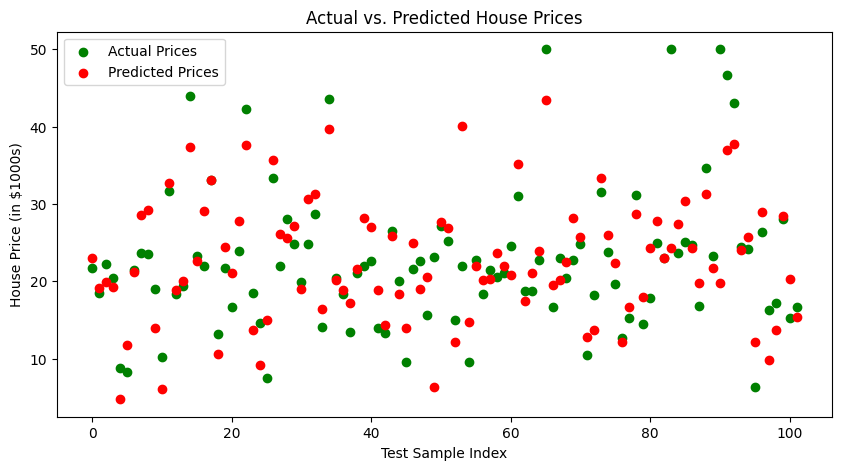

In [77]:
# Visualization: Actual vs. Predicted
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, color="green", label="Actual Prices")
plt.scatter(range(len(y_pred)), y_pred, color="red", label="Predicted Prices")
plt.legend()
plt.xlabel("Test Sample Index")
plt.ylabel("House Price (in $1000s)")
plt.title("Actual vs. Predicted House Prices")
plt.show()

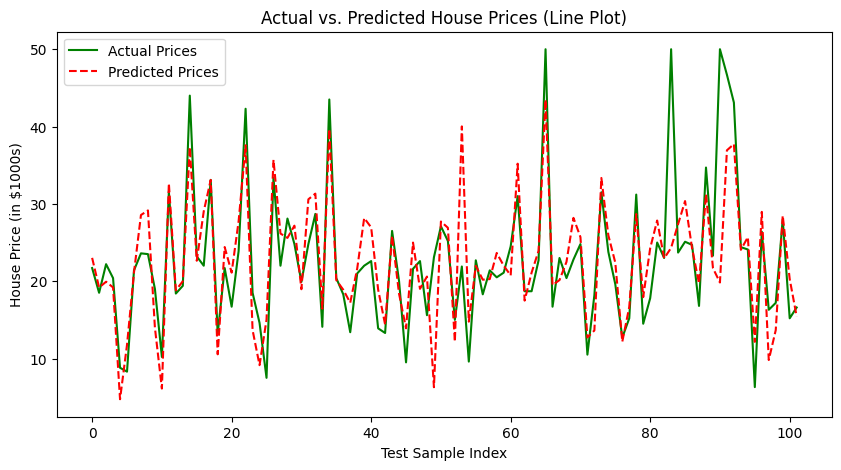

In [78]:
# Line Plot for better visualization
plt.figure(figsize=(10, 5))
plt.plot(range(len(y_test)), y_test, color="green", label="Actual Prices")
plt.plot(range(len(y_pred)), y_pred, color="red", linestyle="dashed", label="Predicted Prices")
plt.legend()
plt.xlabel("Test Sample Index")
plt.ylabel("House Price (in $1000s)")
plt.title("Actual vs. Predicted House Prices (Line Plot)")
plt.show()